In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import Lasso
from sklearn.covariance import GraphLassoCV
import networkx as nx
%matplotlib inline

In [106]:
def gen_all_data():
    years = [2015, 2016]
    all_data = pd.DataFrame()
    df_15_1 = pd.read_csv('data/2015/1.csv', skiprows=1)
    all_data['id'] = df_15_1['person']
    all_data['name'] = df_15_1['name']
    all_data['state'] = df_15_1['state']
    all_data['party'] = df_15_1['party']
    for y in years:
        dirname = 'data/%d' %y
        num_bills = len(os.listdir(dirname))
        for i in range(1, num_bills+1):
            fname = '%s/%d.csv' %(dirname, i)
            df = pd.read_csv(fname, skiprows=1)
            all_data['%d_%d' %(y, i)] = df['vote']

    return all_data

In [107]:
def convert_vote(val):
    if val == 'Nay':
        return -1
    elif val == 'Yea':
        return 1
    else:
        return -1

In [108]:
def convert_party(val):
    if val == 'Democrat':
        return 'D'
    elif val == 'Republican':
        return 'R'
    else:
        return 'I'

In [109]:
all_data = gen_all_data()

In [110]:
all_data.head()

,id,name,state,party,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,...,2016_79,2016_80,2016_81,2016_82,2016_83,2016_84,2016_85,2016_86,2016_87,2016_88
0,300002,Sen. Lamar Alexander [R],TN,Republican,Nay,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,300011,Sen. Barbara Boxer [D],CA,Democrat,Not Voting,Not Voting,Nay,Nay,Nay,Yea,...,Yea,Not Voting,Not Voting,Not Voting,Not Voting,Nay,Nay,Nay,Yea,Yea
2,300018,Sen. Maria Cantwell [D],WA,Democrat,Yea,Nay,Nay,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Yea
3,300019,Sen. Thomas Carper [D],DE,Democrat,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Not Voting,Not Voting,Not Voting,Yea,Yea,Yea
4,300023,Sen. Thad Cochran [R],MS,Republican,Nay,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea


In [91]:
harry_reid = all_data[all_data['id'] == 300082]
mitch = all_data[all_data['id'] == 300072]
hr_nv = 0
mm_nv = 0
for i in range(427):
    if harry_reid.iloc[0, i+3] == 'Not Voting':
        hr_nv += 1
    if mitch.iloc[0, i+3] == 'Not Voting':
        mm_nv += 1
print("Totla times not voting", hr_nv, mm_nv)

('Totla times not voting', 57, 0)


In [92]:
mitch.head()

,id,name,party,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,2015_7,...,2016_79,2016_80,2016_81,2016_82,2016_83,2016_84,2016_85,2016_86,2016_87,2016_88
17,300072,Sen. Mitch McConnell [R],Republican,Nay,Yea,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,Nay,Nay,Yea,Yea


In [35]:
indexed_data = all_data.set_index(['id', 'name'])

In [36]:
indexed_data = indexed_data.sort_index(by='party')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [223]:
idata = indexed_data.drop('party', 1)

In [225]:
cdata = idata.applymap(convert_vote)
cdata_matrix = cdata.as_matrix()
emp_c = np.dot(cdata_matrix, cdata_matrix.T)

In [209]:
cleaned_data = indexed_data.applymap(convert_vote)

In [211]:
raw_data = cleaned_data.as_matrix()

In [212]:
raw_data.shape

(100, 427)

In [213]:
emp_cov = np.dot(raw_data, raw_data.T)

In [227]:
model = GraphLassoCV()
model.fit(emp_c)
cov_ = model.covariance_
prec_ = model.precision_

/usr/local/lib/python3.4/dist-packages/sklearn/covariance/graph_lasso_.py:243: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: -2.039e-03
  ConvergenceWarning)


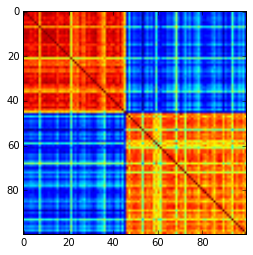

In [226]:
plt.imshow(emp_c)

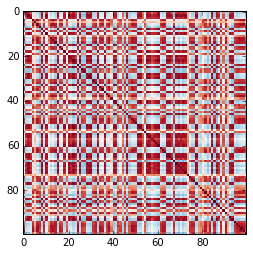

In [78]:
vmax = cov_.max()
emp_vmax = emp_cov.max()
plt.imshow(emp_cov, interpolation='nearest', vmin=-emp_vmax, vmax=emp_vmax,
               cmap=plt.cm.RdBu_r)

In [112]:
indexed_data2 = all_data.set_index(['id'])

In [117]:
sorted_by_party = indexed_data2.sort_index(by=['party'])
row_party_map = {}
row_name_map = {}
for i in range(100):
    row_party_map[i] = convert_party(sorted_by_party.iloc[i]['party'])
    row_name_map[i] = sorted_by_party.iloc[i]['name'][4:-4] +'('+ sorted_by_party.iloc[i]['state']+')'

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [118]:
row_name_map

{0: ' Joe Donnelly(IN)',
 1: ' Kirsten Gillibrand(NY)',
 2: ' Amy Klobuchar(MN)',
 3: ' Claire McCaskill(MO)',
 4: ' Jon Tester(MT)',
 5: ' Robert \xe2\x80\x9cBob\xe2\x80\x9d Casey Jr.(PA)',
 6: ' Sheldon Whitehouse(RI)',
 7: ' Dianne Feinstein(CA)',
 8: ' Thomas Carper(DE)',
 9: ' Sherrod Brown(OH)',
 10: ' Martin Heinrich(NM)',
 11: ' Gary Peters(MI)',
 12: ' Mark Warner(VA)',
 13: ' Barbara Mikulski(MD)',
 14: ' Jeanne Shaheen(NH)',
 15: ' Jeff Merkley(OR)',
 16: ' Michael Bennet(CO)',
 17: ' Alan \xe2\x80\x9cAl\xe2\x80\x9d Franken(MN)',
 18: ' Chris Coons(DE)',
 19: ' Joe Manchin III(WV)',
 20: ' Barbara Boxer(CA)',
 21: ' Benjamin Cardin(MD)',
 22: ' Patty Murray(WA)',
 23: ' Richard Blumenthal(CT)',
 24: ' Bill Nelson(FL)',
 25: ' John \xe2\x80\x9cJack\xe2\x80\x9d Reed(RI)',
 26: ' Edward \xe2\x80\x9cEd\xe2\x80\x9d Markey(MA)',
 27: ' Robert \xe2\x80\x9cBob\xe2\x80\x9d Men\xc3\xa9ndez(NJ)',
 28: ' Harry Reid(NV)',
 29: ' Richard Durbin(IL)',
 30: ' Brian Schatz(HI)',
 31: ' Mazie

In [63]:
sorted_by_party = sorted_by_party.drop(['party', 'name'], axis=1)
sorted_by_party = sorted_by_party.applymap(convert_vote)
sorted_by_party.head()

,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,2015_10,...,2016_79,2016_80,2016_81,2016_82,2016_83,2016_84,2016_85,2016_86,2016_87,2016_88
id,,,,,,,,,,,,,,,,,,,,,
412205,-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,-1,1,1
412223,1,1,-1,-1,-1,1,-1,1,-1,1,...,1,1,1,1,1,-1,-1,-1,1,1
412242,-1,1,-1,-1,-1,1,-1,1,-1,1,...,1,1,1,1,1,-1,1,1,1,1
412243,-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,-1,1,1,1,1
412244,-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,-1,1,1


In [104]:
sorted_by_party = sorted_by_party.drop(['party'], axis=1)

In [53]:
sorted_matrix = sorted_by_party.as_matrix()

In [106]:
emp_sorted = np.dot(sorted_matrix, sorted_matrix.T)

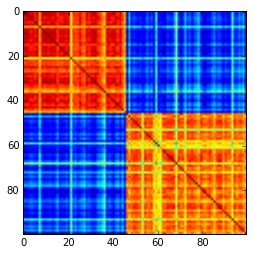

In [107]:
plt.imshow(emp_sorted)

In [108]:
model2 = GraphLassoCV()
model2.fit(emp_sorted)
cov_2 = model.covariance_
prec_2 = model.precision_

/usr/local/lib/python3.4/dist-packages/sklearn/covariance/graph_lasso_.py:243: ConvergenceWarning: graph_lasso: did not converge after 100 iteration: dual gap: 1.989e-03
  ConvergenceWarning)


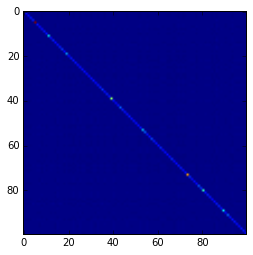

In [112]:
plt.imshow(prec_2)

In [29]:
indexed_data2['party'] = all_data['party']
indexed_data2 = indexed_data2.sort_index(by='party')
indexed_data2.head()


/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,,party,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,...,2016_79,2016_80,2016_81,2016_82,2016_83,2016_84,2016_85,2016_86,2016_87,2016_88
id,name,,,,,,,,,,,,,,,,,,,,,
412205,Sen. Joe Donnelly [D],NaN,Nay,Yea,Yea,Nay,Nay,Yea,Nay,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
412322,Sen. James Risch [R],NaN,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Nay
412269,Sen. Bill Cassidy [R],NaN,Nay,Yea,Not Voting,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,Nay,Nay,Yea,Yea
300023,Sen. Thad Cochran [R],NaN,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
412671,Sen. Benjamin Sasse [R],NaN,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay


In [21]:
all_but_votes = indexed_data2.copy()
all_but_votes = all_but_votes.drop('party', axis=1)
all_but_votes = all_but_votes.applymap(convert_vote)
all_but_votes.head()

,,2015_1,2015_2,2015_3,2015_4,2015_5,2015_6,2015_7,2015_8,2015_9,2015_10,...,2016_79,2016_80,2016_81,2016_82,2016_83,2016_84,2016_85,2016_86,2016_87,2016_88
id,name,,,,,,,,,,,,,,,,,,,,,
412205,Sen. Joe Donnelly [D],-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,-1,1,1
412391,Sen. Joe Manchin III [D],-1,1,1,1,-1,1,-1,-1,1,1,...,1,1,1,1,1,-1,-1,-1,1,1
300011,Sen. Barbara Boxer [D],-1,-1,-1,-1,-1,1,-1,1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,1,1
400064,Sen. Benjamin Cardin [D],1,1,-1,-1,-1,1,-1,1,-1,1,...,1,-1,1,1,1,-1,1,-1,1,1
300076,Sen. Patty Murray [D],1,1,-1,-1,-1,1,-1,1,-1,1,...,1,1,1,1,1,-1,1,1,1,1


In [201]:
model.fit(sorted_matrix)

FloatingPointError: Non SPD result: the system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver

In [202]:
sorted_matrix

array([[-1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ..., -1,  1,  1],
       ..., 
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ..., -1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1]])

In [93]:
row_name_map
row_name_map[5] = 'Robert Casey Jr.'

{0: 'Joe Donnelly',
 1: 'Kirsten Gillibrand',
 2: 'Amy Klobuchar',
 3: 'Claire McCaskill',
 4: 'Jon Tester',
 5: 'Robert \xe2\x80\x9cBob\xe2\x80\x9d Casey Jr.',
 6: 'Sheldon Whitehouse',
 7: 'Dianne Feinstein',
 8: 'Thomas Carper',
 9: 'Sherrod Brown',
 10: 'Martin Heinrich',
 11: 'Gary Peters',
 12: 'Mark Warner',
 13: 'Barbara Mikulski',
 14: 'Jeanne Shaheen',
 15: 'Jeff Merkley',
 16: 'Michael Bennet',
 17: 'Alan \xe2\x80\x9cAl\xe2\x80\x9d Franken',
 18: 'Chris Coons',
 19: 'Joe Manchin III',
 20: 'Barbara Boxer',
 21: 'Benjamin Cardin',
 22: 'Patty Murray',
 23: 'Richard Blumenthal',
 24: 'Bill Nelson',
 25: 'John \xe2\x80\x9cJack\xe2\x80\x9d Reed',
 26: 'Edward \xe2\x80\x9cEd\xe2\x80\x9d Markey',
 27: 'Robert \xe2\x80\x9cBob\xe2\x80\x9d Men\xc3\xa9ndez',
 28: 'Harry Reid',
 29: 'Richard Durbin',
 30: 'Brian Schatz',
 31: 'Mazie Hirono',
 32: 'Tammy Baldwin',
 33: 'Elizabeth Warren',
 34: 'Charles \xe2\x80\x9cChuck\xe2\x80\x9d Schumer',
 35: 'Heidi Heitkamp',
 36: 'Tom Udall',
 37:

In [76]:
of_interest = {}
ids = [93, 34, 64, 28, 65, 92, 29, 47, 44]
of_interest[93] = row_name_map[93]
of_interest[34] = 'Charles Schumer'
of_interest[64] = 'John McCain'
of_interest[28] = 'Harry Reid'
of_interest[65] = 'Mitch McConnell'
of_interest[92] = 'Marco Rubio'
of_interest[29] = 'Richard Durbin'
of_interest[47] = 'Ted Cruz'
of_interest[44] = 'Bernie Sanders'


In [119]:
def nbd_selection(data, alpha, row_party_dict, row_name_dict):
    num_senators = data.shape[1]
    beta = np.zeros((num_senators, num_senators))
    num_bills = data.shape[0]
    zeros_col = np.zeros(num_bills)
    x_data = np.zeros(data.shape)
    print(x_data.shape, data.shape)
    x_data[:, :] = data
    for i in range(num_senators):
        lasso = Lasso(alpha)
        x_data[:, i] = zeros_col
        
        lasso.fit(x_data, data[:, i])
        b_hat_i = lasso.coef_
        beta[:, i] = b_hat_i
        x_data[:, i] = data[:, i]
    
    # symmetricize
    for i in range(0, num_senators):
        for j in range(0, i+1):
            if np.abs(beta[i, j]) > np.abs(beta[j, i]):
                beta[j,i] = beta[i,j]
            else:
                beta[j, i] = beta[i, j]
    print(sum(sum(beta)), " is the total sum")
            
    print("Number of nonzeros in beta: %d" % np.count_nonzero(beta))
    g = nx.Graph(beta)
    repub = {'color': {'r': 255, 'g': 0, 'b': 0, 'a': 0}}
    dem = {'color': {'r': 0, 'g': 0, 'b': 255, 'a': 0}}
    ind = {'color': {'r': 0, 'g': 255, 'b': 0, 'a': 0}}

    for i in g.nodes():
        if i in row_name_dict:
            g.node[i]['label'] = row_name_dict[i]
        if row_party_dict[i] == 'D':   
            g.node[i]['viz'] = dem
        elif row_party_dict[i] == 'I':
            g.node[i]['viz'] = ind
        else:
            g.node[i]['viz'] = repub

    #nx.write_gml(g, 'graphs/beta_%.2f.gml' %alpha)
    nx.write_gexf(g, "graphs/named_%.2f.gexf" %alpha, version="1.2draft")
    return g

In [120]:
i = 1
for alpha in [0.05*i for i in range(1,21)]:
    g = nbd_selection(sorted_matrix.T, alpha, row_party_map, row_name_map)

((427, 100), (427, 100))
(89.210714538254351, ' is the total sum')
Number of nonzeros in beta: 1264
((427, 100), (427, 100))
(81.518146156399112, ' is the total sum')
Number of nonzeros in beta: 1000
((427, 100), (427, 100))
(74.109416738763031, ' is the total sum')
Number of nonzeros in beta: 848
((427, 100), (427, 100))
(67.127932821212923, ' is the total sum')
Number of nonzeros in beta: 720
((427, 100), (427, 100))
(60.274301612504921, ' is the total sum')
Number of nonzeros in beta: 620
((427, 100), (427, 100))
(53.62721437909731, ' is the total sum')
Number of nonzeros in beta: 538
((427, 100), (427, 100))
(47.13567776336582, ' is the total sum')
Number of nonzeros in beta: 468
((427, 100), (427, 100))
(40.735798709939132, ' is the total sum')
Number of nonzeros in beta: 422
((427, 100), (427, 100))
(34.600433586297378, ' is the total sum')
Number of nonzeros in beta: 358
((427, 100), (427, 100))
(28.914881036874345, ' is the total sum')
Number of nonzeros in beta: 300
((427, 100

In [283]:
sorted_matrix

array([[-1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1, -1, ..., -1,  1,  1],
       ..., 
       [-1,  1,  1, ...,  1,  1, -1],
       [-1,  1,  1, ..., -1,  1, -1],
       [-1,  1,  1, ...,  1,  1, -1]])

In [288]:
g = nx.read_gml('graphs/beta_0.05.gml')

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


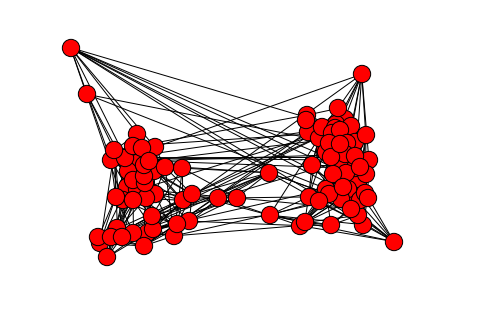

In [289]:
nx.draw_spring(g)